In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [29]:
from sklearn.compose import ColumnTransformer
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow
from tensorflow_core.python.keras.utils.data_utils import Sequence
from tensorflow.keras.utils import Sequence
import numpy as np
import tensorflow as tf

In [32]:
# load admissions data
admissions_data = pd.read_csv("admissions_data.csv")
print(admissions_data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [33]:
admissions_data.describe()
print(admissions_data.shape)

(500, 9)


In [34]:
# mark predicted values
labels = admissions_data.iloc[:,-1]
print(labels.describe())

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64


In [35]:
# mark features
features = admissions_data.iloc[:, 1:8]

In [36]:
#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)


In [37]:
# standardizing our data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [38]:
features_train_scale = pd.DataFrame(features_train_scale, columns = features_train.columns)
features_test_scale = pd.DataFrame(features_test_scale, columns = features_test.columns)

In [39]:
print(features_train_scale.describe())
print(features_test_scale.describe())

          GRE Score   TOEFL Score  University Rating           SOP  \
count  3.750000e+02  3.750000e+02       3.750000e+02  3.750000e+02   
mean  -1.373716e-15  9.379164e-16      -9.473903e-17 -2.036889e-16   
std    1.001336e+00  1.001336e+00       1.001336e+00  1.001336e+00   
min   -2.162386e+00 -2.506821e+00      -1.827711e+00 -2.400715e+00   
25%   -7.045978e-01 -7.056302e-01      -9.590273e-01 -8.885067e-01   
50%    2.429648e-02 -5.065167e-02      -9.034315e-02  1.196325e-01   
75%    7.531908e-01  7.680714e-01       7.783410e-01  6.237021e-01   
max    2.119868e+00  2.078028e+00       1.647025e+00  1.631841e+00   

               LOR           CGPA      Research  
count  3.750000e+02  3.750000e+02  3.750000e+02  
mean  -1.136868e-16 -1.316873e-15 -9.473903e-18  
std    1.001336e+00  1.001336e+00  1.001336e+00  
min   -2.144320e+00 -2.964876e+00 -1.116024e+00  
25%   -5.154475e-01 -7.520337e-01 -1.116024e+00  
50%    2.750984e-02 -1.996550e-02  8.960383e-01  
75%    5.704672e-01

In [40]:
# function to design the model
def design_model(feature_data):
	model = Sequential()
	num_features = feature_data.shape[1]
	input = tf.keras.Input(shape=(num_features))
	model.add(input)
	# this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
	hidden_layer = layers.Dense(16, activation='relu')
	model.add(hidden_layer)
	model.add(layers.Dropout(0.1))
	hidden_layer_2 = layers.Dense(8, activation='relu')
	model.add(hidden_layer_2)
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(1))

	# using an adam optimizer with a learning rate of 0.005
	# using mean-squared error as our loss function and mean average error as our metric
	opt = keras.optimizers.Adam(learning_rate=0.005)
	model.compile(loss='mse', metrics=['mae'], optimizer=opt)
	return model

In [41]:
# apply the model to the scaled training data
model = design_model(features_train_scale)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                128       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [43]:
# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Train on 281 samples, validate on 94 samples
Epoch 1/100
281/281 [==============================] - 2s 6ms/sample - loss: 0.2751 - mae: 0.4190 - val_loss: 0.0514 - val_mae: 0.1928
Epoch 2/100
281/281 [==============================] - 0s 612us/sample - loss: 0.1102 - mae: 0.2711 - val_loss: 0.0180 - val_mae: 0.1086
Epoch 3/100
281/281 [==============================] - 0s 696us/sample - loss: 0.0547 - mae: 0.1912 - val_loss: 0.0136 - val_mae: 0.0971
Epoch 4/100
281/281 [==============================] - 0s 723us/sample - loss: 0.0417 - mae: 0.1634 - val_loss: 0.0119 - val_mae: 0.0867
Epoch 5/100
281/281 [==============================] - 0s 766us/sample - loss: 0.0351 - mae: 0.1499 - val_loss: 0.0112 - val_mae: 0.0871
Epoch 6/100
281/281 [==============================] - 0s 699us/sample - loss: 0.0274 - mae: 0.1299 - val_loss: 0.0081 - val_mae: 0.0731
Epoch 7/100
281/281 [==============================] - 0s 730us/sample - loss: 0.0222 - mae: 0.1160 - val_loss: 0.0088 - val_mae: 0.078

In [44]:
# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

In [45]:
# view the MAE performance
print("MAE: ", val_mae)

MAE:  0.04647823


In [47]:
# evauate r-squared score
y_pred = model.predict(features_test_scale)
print(r2_score(labels_test,y_pred))

0.7827367930928147


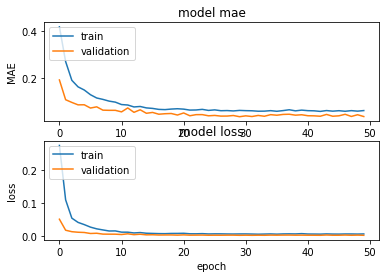

In [51]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()